# Validation curves

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Now let’s create some data to which we will fit our model:**

In [2]:
def makedata(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    x = rng.rand(N, 1) **2
    y = 10 -1./ (x.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return x, y
x, y = makedata(40)

**We can now visualize our data, along with polynomial fits of several degrees**

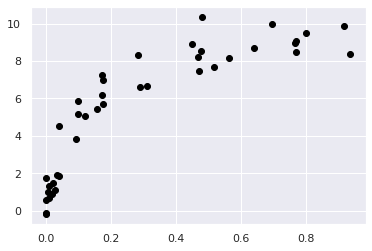

In [3]:
plt.scatter(x.ravel(), y, color='black')

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

## Create a linear regressor

## Create a polynomial regressor

## Validation curve

**We can make progress in this by visualizing the validation curve for this particular data and model, we can do this straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range**

In [ ]:
from sklearn.model_selection import validation_curve

In [25]:
def plot_validation_curve(train_score, val_score):
    plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
    plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
    plt.legend(loc='best')
    plt.ylim(0, 1)
    plt.xlabel('degree')
    plt.ylabel('score')
    plt.show()

In [12]:
train_score, val_score = validation_curve(YOUR_MODEL(), x, y, YOUR_PARAM, cv=7)

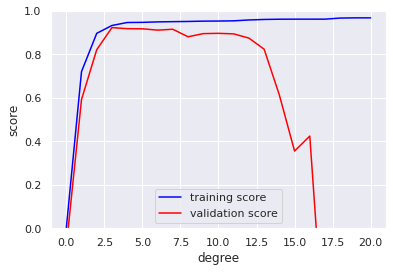

In [26]:
plot_validation_curve(train_score, val_score)

**Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.**

## Learning curve

In [ ]:
from sklearn.model_selection import learning_curve

In [22]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc='best')

In [23]:
train_sizes, train_scores, validation_scores = learning_curve(YOUR_MODEL, x, y, cv=5)

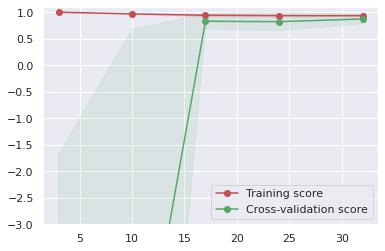

In [24]:
plot_learning_curve(train_sizes, train_scores, validation_scores)